<a href="https://colab.research.google.com/github/Sbolivar16/MolecularDocking/blob/main/Heatmap_with_dendrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🧬 **Ligand–Residue Interaction Heatmaps: A Visual Toolkit for Molecular Docking Analysis**

<div align="center">

🧪 **Santiago Bolívar A.**  
**Qco., M.Sc., Ph.D.**  
📍 *National University of Rosario, Argentina*  
🔗 [GitHub Profile](https://github.com/Sbolivar16)

</div>

---

This Jupyter Notebook provides a streamlined pipeline for **analyzing and visualizing ligand–residue interaction patterns** derived from **molecular docking simulations**. The goal is to assist researchers in identifying key residues involved in binding and to **cluster ligands** based on their interaction profiles using advanced data science techniques.

---

### 🔍 What Does This Notebook Do?

- ✅ **Loads ligand–residue interaction data** (from `.csv` files generated from docking tools).
- ✅ **Assigns numeric codes** to each type of molecular interaction (e.g., hydrogen bonds, hydrophobic contacts).
- ✅ **Constructs interaction matrices** for all ligand–residue pairs.
- ✅ **Generates heatmaps and dendrograms** to cluster ligands and residues by similarity of interactions.
- ✅ **Customizes visual outputs** with descriptive color legends and dendrograms for deeper structural insights.

---

### 🧪 Why Is This Important for Molecular Docking?

In molecular docking workflows, large sets of ligands are often screened against a protein target. However, once docking scores are available, understanding **how** and **where** these ligands interact is often more informative than the raw energy score. This notebook allows you to:

- 🎯 Detect **key binding residues** across ligand sets.
- 🔎 Group ligands based on **interaction similarity**, which can reflect **pharmacophoric or chemical pattern** similarities.
- 🧠 Identify clusters of compounds with **common binding modes**.
- 📊 Generate **publication-ready visualizations** for manuscripts and presentations.

---

### 📊 Why Use Heatmaps + Dendrograms?

Traditional docking outputs (e.g., binding scores) fail to convey **structural interaction context**. In contrast:

- **Heatmaps** reveal patterns across many ligands and residues at a glance.
- **Dendrograms** (hierarchical clustering trees) group similar ligands or residues based on interaction fingerprints.
- The combination of both enables **data-driven decision making** in ligand prioritization.

---

### 🧰 Technologies Used

- 🐼 **Pandas** – Data manipulation  
- 🌈 **Seaborn & Matplotlib** – Advanced plotting  
- 🧬 **NumPy** – Matrix computation  
- 🧱 **Custom colormaps & legends** – For visual clarity and interpretability  

---

### 📌 Intended Audience

This notebook is ideal for:

- Computational chemists  
- Molecular docking specialists  
- Structural bioinformaticians  
- Drug discovery teams performing virtual screening  

---

> *Use this tool to bridge the gap between docking output and structural interpretation, enhancing your understanding of protein–ligand interactions.*


In [23]:
# we install the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


 ⚠️ Keep in mind that the example we used to create this notebook contains the following structure. Therefore, your working file must have the same structure in order for it to work. It must be in `.csv` format.


| Ligand | Residue | Interaction     | Scoring_Vina |
|--------|---------|------------------|--------------|
| Lig1   | TYR17   | H-bond           | -8.5         |
| Lig1   | ASP267  | Van der Waals    | -8.5         |
| Lig1   | GLU376  | Hydrophobic      | -8.5         |
| Lig2   | TYR17   | Van der Waals    | -9.1         |
| Lig2   | LEU432  | Salt bridge      | -9.1         |




In [26]:
# Change the name if your file is different
data = pd.read_csv('Results.csv')
print(data.head())


  Ligand Residue    Interaction  Scoring_Vina
0   Lig1   TYR17         H-bond          -8.5
1   Lig1  ASP267  Van der Waals          -8.5
2   Lig1  GLU376    Hydrophobic          -8.5
3   Lig2   TYR17  Van der Waals          -9.1
4   Lig2  LEU432    Salt bridge          -9.1


In [27]:
# Ordered lists of ligands and residues
residues = sorted(data['Residue'].unique())
ligands = sorted(data['Ligand'].unique())

# Mapping of interaction types to numbers
interaction_map = {"H-bond": 1, "Hydrophobic": 2, "Van der Waals": 3, "Salt bridge": 4}

# Interaction matrix
interaction_matrix = np.zeros((len(ligands), len(residues)))

for i, lig in enumerate(ligands):
    for j, res in enumerate(residues):
        inter = data[(data['Ligand'] == lig) & (data['Residue'] == res)]['Interaction']
        if not inter.empty:
            interaction_matrix[i, j] = interaction_map.get(inter.values[0], 0)



<ipython-input-28-ce3ae31d688c>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', 5)  # 5 colors (including 0)


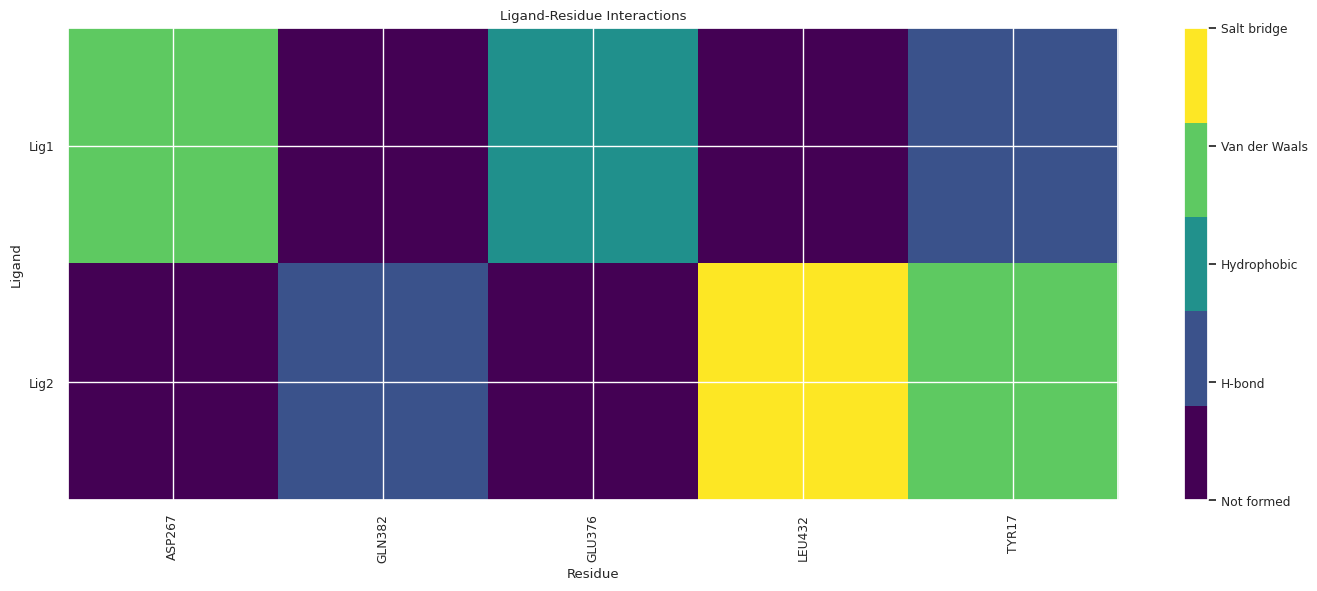

In [28]:
plt.figure(figsize=(14, 6))
cmap = plt.cm.get_cmap('viridis', 5)  # 5 colors (including 0)
img = plt.imshow(interaction_matrix, aspect='auto', cmap=cmap, vmin=0, vmax=4)

# Customized color bar
cbar = plt.colorbar(img, ticks=[0, 1, 2, 3, 4])
cbar.ax.set_yticklabels(['Not formed', 'H-bond', 'Hydrophobic', 'Van der Waals', 'Salt bridge'])

plt.yticks(range(len(ligands)), ligands)
plt.xticks(range(len(residues)), residues, rotation=90)
plt.title('Ligand-Residue Interactions')
plt.xlabel('Residue')
plt.ylabel('Ligand')
plt.tight_layout()
plt.show()



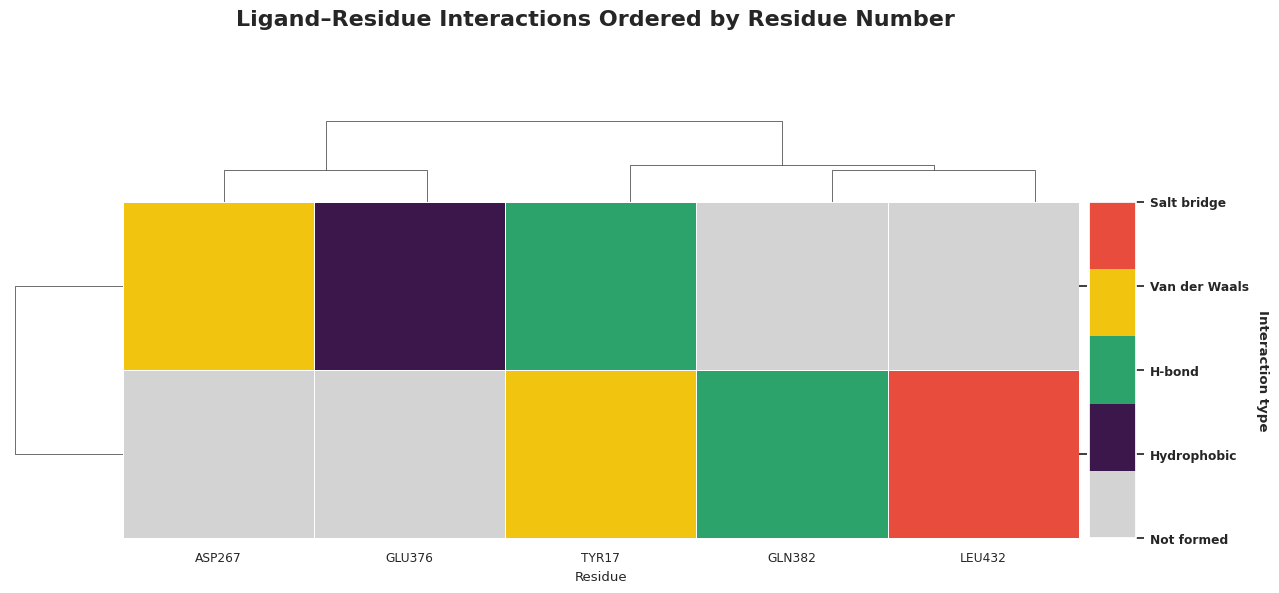

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the data
data = pd.read_csv('Results.csv')  # Asegúrate que el archivo se llame así o cámbialo

# Map interactions to numbers
interaction_map = {
    "Not formed": 0,
    "Hydrophobic": 1,
    "H-bond": 2,
    "Van der Waals": 3,
    "Salt bridge": 4
}
data['Interaction_num'] = data['Interaction'].map(interaction_map)

# Create the pivot matrix
matrix = data.pivot(index='Ligand', columns='Residue', values='Interaction_num')
clean_matrix = matrix.fillna(0)

# Remove columns and rows with zero variance
clean_matrix = clean_matrix.loc[:, clean_matrix.std() != 0]
clean_matrix = clean_matrix.loc[clean_matrix.std(axis=1) != 0, :]

# Custom colors
cmap = ListedColormap(['#d3d3d3', '#3b174b', '#2ba36a', '#f1c40f', '#e74c3c'])
interaction_names = ['Not formed', 'Hydrophobic', 'H-bond', 'Van der Waals', 'Salt bridge']

# Create the clustermap without showing the color bar automatically
g = sns.clustermap(
    clean_matrix,
    cmap=cmap,
    linewidths=0.5,
    figsize=(12, 6),
    metric='euclidean',
    method='ward',
    dendrogram_ratio=(.1, .2),
    cbar_pos=None,
    xticklabels=True,
    yticklabels=True
)

# Add color bar manually
divider = make_axes_locatable(g.ax_heatmap)
cax = divider.append_axes("right", size="5%", pad=0.1)

norm = plt.Normalize(vmin=0, vmax=4)
cb = plt.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap=cmap),
    cax=cax,
    ticks=[0, 1, 2, 3, 4]
)
cb.set_ticklabels(interaction_names)
cb.ax.set_ylabel('Interaction type', rotation=270, labelpad=15, weight='bold')

for tick in cb.ax.get_yticklabels():
    tick.set_fontweight('bold')

# General title
g.fig.subplots_adjust(top=0.80)
g.fig.suptitle(
    'Ligand–Residue Interactions Ordered by Residue Number',
    fontsize=16,
    fontweight='bold',
    y=0.98
)

plt.show()


### Interpretation of the Ligand–Residue Interaction Heatmap

The figure displays a **hierarchical heatmap** that visualizes the types of interactions formed between various ligands and specific residues within a protein’s binding site.

#### Components of the plot:

- **Rows**: Represent the different *ligands* analyzed (e.g., Lig1, Lig2).
- **Columns**: Correspond to *residues* within the binding pocket, identified by their name and residue number.
- **Colors**: Each color encodes a specific type of molecular interaction:
  - 🔴 **Salt bridge**
  - 🟡 **Van der Waals**
  - 🟢 **H-bond** (hydrogen bond)
  - 🟣 **Hydrophobic** interaction
  - ⚪ **Not formed** (no interaction detected)

#### How to interpret the heatmap:

- The matrix indicates **which type of interaction**, if any, each ligand forms with each residue.
- **Gray cells** indicate that no interaction was formed with that residue.
- The **top dendrogram** groups residues based on similarity in their interaction patterns across ligands, potentially highlighting functionally related regions of the binding site.
- Comparing **ligand rows** helps identify differences in interaction profiles, which may explain variations in binding affinity or biological activity.

#### Application:

This visualization can help prioritize ligands that form key interactions (e.g., hydrogen bonds or salt bridges) with critical binding site residues. It is also useful as a foundation for SAR/QSAR modeling or rational ligand design.



### How to adapt the code to other types of interactions?

This code generates a hierarchical heatmap representing the types of interactions between ligands and residues of a protein. It is initially designed to handle five types of interactions:

- `Not formed`  
- `Hydrophobic`  
- `H-bond`  
- `Van der Waals`  
- `Salt bridge`  

If your CSV file contains **other types of interactions**, you should follow these steps to adapt the code.

---

🧩 **Step 1: Identify the new interaction types**  

You can quickly check what types of interactions are in your file using:

```python
print(data['Interacción'].unique())
```

This will return all unique names present in the "Interacción" column, for example:

```python
['H-bond', 'Van der Waals', 'π-π stacking', 'Hydrophobic', 'Salt bridge']
```

### 🛠 Step 2: Modify the interaccion_map dictionary

Add the new types to the dictionary, assigning a distinct integer to each one:

```python
interaccion_map = {
    "Not formed": 0,
    "Hydrophobic": 1,
    "H-bond": 2,
    "Van der Waals": 3,
    "Salt bridge": 4,
    "π-π stacking": 5,
    "Halogen bond": 6
}
```
### 🎨 Step 3: Update the color palette and legend bar

Make sure to extend the color map (cmap) and the list of interaction names:

```python
from matplotlib.colors import ListedColormap

cmap = ListedColormap([
    '#d3d3d3',  # Not formed
    '#3b174b',  # Hydrophobic
    '#2ba36a',  # H-bond
    '#f1c40f',  # Van der Waals
    '#e74c3c',  # Salt bridge
    '#8e44ad',  # π-π stacking
    '#3498db'   # Halogen bond
])

nombres_interacciones = [
    'Not formed', 'Hydrophobic', 'H-bond',
    'Van der Waals', 'Salt bridge',
    'π-π stacking', 'Halogen bond'
]
```

Then modify the normalization and ticks of the colorbar:

```python
norm = plt.Normalize(vmin=0, vmax=6)
cb = plt.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap=cmap),
    cax=cax,
    ticks=list(range(7))
)
cb.set_ticklabels(nombres_interacciones)
```

---

### ✅ Final Recommendation

Make sure that:

The number of elements in interaccion_map, cmap, and nombres_interacciones matches.

Each interaction type has a unique and readable color.

There are no typographical errors in the names from the CSV and the dictionary.

This will ensure a correct and useful visualization of your interaction data.